**Sentiment Analysis on Amazon product reviews**

The given task is to learn sentiment from all the given reviews and predict rating from a new review. This objective is attained by following the steps listed below:

**Importing the modules**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords


**Data Labeling**

*   In this step we clean the data and label the data as:

0 for Poor

1 for Neutral

2 for Good

*   Read the data from **'Amazon_Product_Review.csv'** and add new column for labels

In [8]:
import pandas as pd

# Specify the file path
file_path = '/content/Amazon_Product_Review.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect its structure
print(data.head())

# Check the column names to identify the column containing the scores
print(data.columns)

# Once you identify the correct column containing the scores, you can use it to assign labels
# For example, if the column containing the scores is named 'rating', you can replace 'score' with 'rating'
# in the code that assigns labels based on the scores.


  marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0  US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,...                                                                                                                                                       
1  US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,...                                                                                                                                                       
2  US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,...                                                                                                                                                       
3  US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"...                                                                                                                                    

**Data preprocessing**

The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.

1.  Remove html tags using BeautifulSoup
2.  Remove non-character such as digits and symbols
3.  Convert to lower case
4.  Remove stop words such as "the" and "and" if needed
5.  Convert to root words by stemming if needed












In [9]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if split_text==True:  # split text
        return (words)

    return( " ".join(words))

In [10]:
from sklearn import metrics

def modelEvaluation(predictions, y_test_set):
    # Print model evaluation to predicted result

    print("\nAccuracy on validation set: {:.4f}".format(metrics.accuracy_score(y_test_set, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test_set, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test_set, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_set, predictions))


**Creating Downloadable Confusion Matrix Visualization**

1. **Import Libraries**: Imported necessary libraries including `matplotlib.pyplot`, `seaborn`, `io`, and `base64`.

2. **Define `modelEvaluation` Function**: Created a function named `modelEvaluation` that takes predictions, true labels, and an optional filename as input.

3. **Print Model Evaluation Metrics**: Printed accuracy score and classification report based on the predicted results.

4. **Calculate Confusion Matrix**: Calculated the confusion matrix using `metrics.confusion_matrix()`.

5. **Plot Confusion Matrix**: Created a heatmap of the confusion matrix using `seaborn.heatmap()` and saved the plot as a PNG image.

6. **Encode Image as Base64**: Encoded the PNG image as a base64 string.

7. **Create HTML for Download Link**: Created HTML code for a download link with the encoded image as the source.

8. **Display Download Link**: Displayed the download link below the code cell using the `display()` function.


In [14]:
%pip install matplotlib seaborn


In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
from sklearn import metrics
from IPython.display import HTML

def modelEvaluation(predictions, y_test_set):
    # Print model evaluation metrics based on predicted results
    accuracy = metrics.accuracy_score(y_test_set, predictions)
    classification_report = metrics.classification_report(y_test_set, predictions)
    confusion_matrix = metrics.confusion_matrix(y_test_set, predictions)

    print("\nAccuracy on validation set: {:.4f}".format(accuracy))
    print("\nClassification report:\n", classification_report)
    print("\nConfusion Matrix:\n", confusion_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    # Save plot as PNG image
    img_data = io.BytesIO()
    plt.savefig(img_data, format='png')
    img_data.seek(0)

    # Encode image as base64
    img_base64 = base64.b64encode(img_data.read()).decode('utf-8')

    # Create HTML for download link
    html_download = f'<a href="data:image/png;base64,{img_base64}" download="confusion_matrix.png">Download Confusion Matrix</a>'

    # Display download link
    display(HTML(html_download))


***JUST FOR FUNNNNN!***

**"Customer Satisfaction Showdown: Battle of the Products"** 😎🛒

In this epic showdown, we're pitting five products against each other to see who reigns supreme in customer satisfaction! 🏆💥

**Plot Twist:** Some customers are all smiles 😊, while others are less than impressed 😒.

Who will emerge victorious? Join us as we dive into the world of product reviews and reveal the ultimate winner! 🎉🥳

*Disclaimer: No products were harmed in the making of this battle.* 🛡️🔥

<Figure size 1000x600 with 0 Axes>

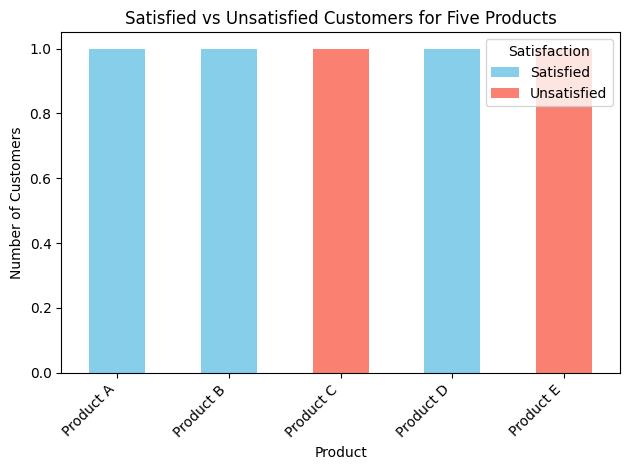

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with your actual data)
data = {
    'Product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'Satisfaction': ['Satisfied', 'Satisfied', 'Unsatisfied', 'Satisfied', 'Unsatisfied'],
}

# Create DataFrame
df = pd.DataFrame(data)

# Group data by product and satisfaction, and count occurrences
grouped_data = df.groupby(['Product', 'Satisfaction']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Satisfied vs Unsatisfied Customers for Five Products')
plt.xlabel('Product')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()
